# TTK Persistence Analysis on Heptane Gas Combustion
#### Nathan Edwards
#### CS 6950 Directed Readings
#### Dr. Steve Petruzza
#### Using dataset 'csafe_heptane_302x302x302_uint8.raw' from https://klacansky.com/open-scivis-datasets/ 

In [ ]:
#! [local path to pvPython]
from paraview.simple import *
#### disable automatic camera reset on 'Show'
paraview.simple._DisableFirstRenderCameraReset()

# Read in Gas Plume Data

In [ ]:
# create a new 'Image Reader'
csafe_heptane_302x302x302_uint8raw = ImageReader(registrationName='csafe_heptane_302x302x302_uint8.raw', FileNames=['D:\\Downloads\\csafe_heptane_302x302x302_uint8.raw'])

# Properties modified on csafe_heptane_302x302x302_uint8raw
csafe_heptane_302x302x302_uint8raw.DataScalarType = 'unsigned char'
csafe_heptane_302x302x302_uint8raw.DataByteOrder = 'LittleEndian'
csafe_heptane_302x302x302_uint8raw.DataOrigin = [-151.0, -151.0, -151.0]
csafe_heptane_302x302x302_uint8raw.DataExtent = [0, 301, 0, 301, 0, 301]

UpdatePipeline(time=0.0, proxy=csafe_heptane_302x302x302_uint8raw)

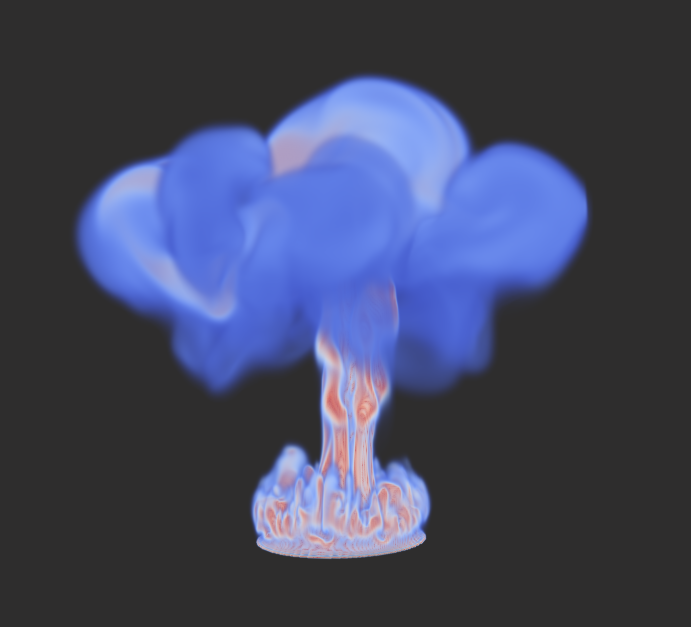

# Split Data

## 1st Split

#### Persitence Curve of First Split

In [ ]:
# find source
csafe_heptane_302x302x302_uint8raw = FindSource('csafe_heptane_302x302x302_uint8.raw')

# create a new 'Extract Subset'
extractSubset1 = ExtractSubset(registrationName='ExtractSubset1', Input=csafe_heptane_302x302x302_uint8raw)
extractSubset1.VOI = [0, 301, 0, 301, 0, 301]

# Properties modified on extractSubset1
extractSubset1.VOI = [0, 301, 150, 301, 150, 301]

UpdatePipeline(time=0.0, proxy=extractSubset1)

# create a new 'Contour'
contour1 = Contour(registrationName='Contour1', Input=extractSubset1)
contour1.ContourBy = ['POINTS', 'ImageFile']
contour1.Isosurfaces = [127.5]
contour1.PointMergeMethod = 'Uniform Binning'

# Properties modified on contour1
contour1.Isosurfaces = [1.0]

UpdatePipeline(time=0.0, proxy=contour1)

# create a new 'Tetrahedralize'
tetrahedralize1 = Tetrahedralize(registrationName='Tetrahedralize1', Input=contour1)

UpdatePipeline(time=0.0, proxy=tetrahedralize1)

# create a new 'TTK GeometrySmoother'
tTKGeometrySmoother1 = TTKGeometrySmoother(registrationName='TTKGeometrySmoother1', Input=tetrahedralize1)
tTKGeometrySmoother1.InputMaskField = ['POINTS', 'ImageFile']

UpdatePipeline(time=0.0, proxy=tTKGeometrySmoother1)

# create a new 'Elevation'
elevation1 = Elevation(registrationName='Elevation1', Input=tTKGeometrySmoother1)
elevation1.LowPoint = [-150.99452209472656, -1.0, -1.0]
elevation1.HighPoint = [123.0, 149.75, 149.0]

# toggle 3D widget visibility (only when running from the GUI)
Hide3DWidgets(proxy=elevation1)

# Properties modified on elevation1
elevation1.ScalarRange = [0.0, 100.0]
elevation1.LowPoint = [-150.99452209472656, 74.375, 74.0]
elevation1.HighPoint = [123.0, 74.375, 74.0]

UpdatePipeline(time=0.0, proxy=elevation1)

# create a new 'TTK PersistenceCurve'
tTKPersistenceCurve1 = TTKPersistenceCurve(registrationName='TTKPersistenceCurve1', Input=elevation1)
tTKPersistenceCurve1.ScalarField = ['POINTS', 'Elevation']
tTKPersistenceCurve1.InputOffsetField = ['POINTS', 'Elevation']

UpdatePipeline(time=0.0, proxy=tTKPersistenceCurve1)

UpdatePipeline(time=0.0, proxy=tTKPersistenceCurve1)

UpdatePipeline(time=0.0, proxy=tTKPersistenceCurve1)

UpdatePipeline(time=0.0, proxy=tTKPersistenceCurve1)

# set active source
SetActiveSource(tTKPersistenceCurve1)

UpdatePipeline(time=0.0, proxy=tTKPersistenceCurve1)

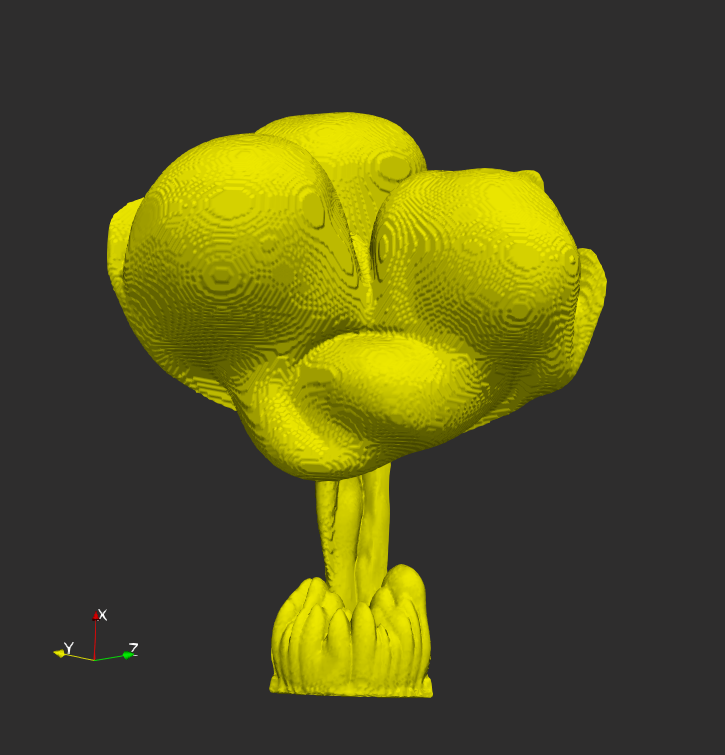

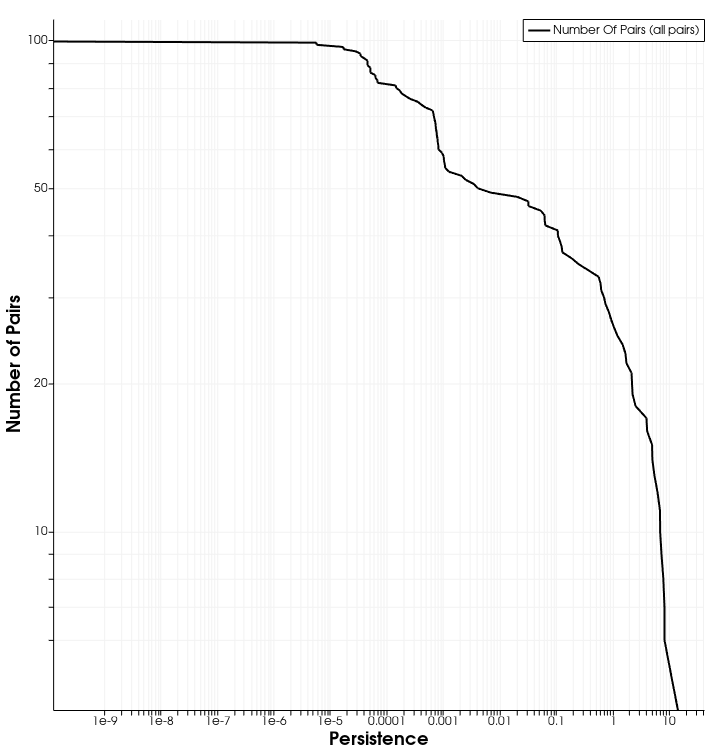

#### Persistence Diagram and Critical Points of First Split with smoothener set to 1

In [ ]:
# find source
elevation1 = FindSource('Elevation1')

# set active source
SetActiveSource(elevation1)

# create a new 'TTK PersistenceDiagram'
tTKPersistenceDiagram1 = TTKPersistenceDiagram(registrationName='TTKPersistenceDiagram1', Input=elevation1)
tTKPersistenceDiagram1.ScalarField = ['POINTS', 'Elevation']
tTKPersistenceDiagram1.InputOffsetField = ['POINTS', 'Elevation']

# find source
contour1 = FindSource('Contour1')

# find source
tTKGeometrySmoother1 = FindSource('TTKGeometrySmoother1')

UpdatePipeline(time=0.0, proxy=tTKPersistenceDiagram1)

# find source
tTKPersistenceCurve1 = FindSource('TTKPersistenceCurve1')

# find source
csafe_heptane_302x302x302_uint8raw = FindSource('csafe_heptane_302x302x302_uint8.raw')

# find source
extractSubset1 = FindSource('ExtractSubset1')

# find source
tetrahedralize1 = FindSource('Tetrahedralize1')

# create a new 'Threshold'
threshold1 = Threshold(registrationName='Threshold1', Input=tTKPersistenceDiagram1)
threshold1.Scalars = ['POINTS', 'CriticalType']
threshold1.UpperThreshold = 3.0

# Properties modified on threshold1
threshold1.Scalars = ['CELLS', 'PairIdentifier']
threshold1.LowerThreshold = -1.0
threshold1.UpperThreshold = -0.1

UpdatePipeline(time=0.0, proxy=threshold1)

# create a new 'Extract Surface'
extractSurface1 = ExtractSurface(registrationName='ExtractSurface1', Input=threshold1)

UpdatePipeline(time=0.0, proxy=extractSurface1)

# create a new 'Tube'
tube1 = Tube(registrationName='Tube1', Input=extractSurface1)
tube1.Scalars = ['POINTS', 'CriticalType']
tube1.Vectors = ['POINTS', 'Coordinates']

UpdatePipeline(time=0.0, proxy=tube1)

# set active source
SetActiveSource(threshold1)

# set active source
SetActiveSource(tTKPersistenceDiagram1)

# create a new 'Threshold'
threshold2 = Threshold(registrationName='Threshold2', Input=tTKPersistenceDiagram1)
threshold2.Scalars = ['POINTS', 'CriticalType']
threshold2.UpperThreshold = 3.0

# Properties modified on threshold2
threshold2.Scalars = ['CELLS', 'PairIdentifier']
threshold2.UpperThreshold = 154.0

UpdatePipeline(time=0.0, proxy=threshold2)

RenameProxy('pairs1', 'sources', threshold2)

# rename source object
RenameSource('pairs1', threshold2)

# create a new 'Threshold'
threshold2_1 = Threshold(registrationName='Threshold2', Input=threshold2)
threshold2_1.Scalars = ['POINTS', 'CriticalType']
threshold2_1.UpperThreshold = 3.0

# Properties modified on threshold2_1
threshold2_1.Scalars = ['CELLS', 'Persistence']
threshold2_1.UpperThreshold = 100.0

UpdatePipeline(time=0.0, proxy=threshold2_1)

RenameProxy('persistenceThreshold1', 'sources', threshold2_1)

# rename source object
RenameSource('persistenceThreshold1', threshold2_1)

# create a new 'Extract Surface'
extractSurface2 = ExtractSurface(registrationName='ExtractSurface2', Input=threshold2_1)

UpdatePipeline(time=0.0, proxy=extractSurface2)

# create a new 'Tube'
tube2 = Tube(registrationName='Tube2', Input=extractSurface2)
tube2.Scalars = ['POINTS', 'CriticalType']
tube2.Vectors = ['POINTS', 'Coordinates']

UpdatePipeline(time=0.0, proxy=tube2)

# set active source
SetActiveSource(threshold2_1)

# create a new 'TTK IcospheresFromPoints'
tTKIcospheresFromPoints1 = TTKIcospheresFromPoints(registrationName='TTKIcospheresFromPoints1', Input=threshold2_1)

# Properties modified on tTKIcospheresFromPoints1
tTKIcospheresFromPoints1.Radius = 1.5

UpdatePipeline(time=0.0, proxy=tTKIcospheresFromPoints1)

# set active source
SetActiveSource(tTKPersistenceDiagram1)

# set active source
SetActiveSource(elevation1)

# create a new 'TTK TopologicalSimplification'
tTKTopologicalSimplification1 = TTKTopologicalSimplification(registrationName='TTKTopologicalSimplification1', Domain=elevation1,
    Constraints=threshold2_1)
tTKTopologicalSimplification1.ScalarField = ['POINTS', 'Elevation']
tTKTopologicalSimplification1.InputOffsetField = ['POINTS', 'Elevation']
tTKTopologicalSimplification1.VertexIdentifierField = ['POINTS', 'CriticalType']

UpdatePipeline(time=0.0, proxy=tTKTopologicalSimplification1)

# create a new 'TTK ScalarFieldCriticalPoints'
tTKScalarFieldCriticalPoints1 = TTKScalarFieldCriticalPoints(registrationName='TTKScalarFieldCriticalPoints1', Input=tTKTopologicalSimplification1)
tTKScalarFieldCriticalPoints1.ScalarField = ['POINTS', 'Elevation']
tTKScalarFieldCriticalPoints1.InputOffsetField = ['POINTS', 'Elevation']

UpdatePipeline(time=0.0, proxy=tTKScalarFieldCriticalPoints1)

# create a new 'TTK IcospheresFromPoints'
tTKIcospheresFromPoints2 = TTKIcospheresFromPoints(registrationName='TTKIcospheresFromPoints2', Input=tTKScalarFieldCriticalPoints1)

# Properties modified on tTKIcospheresFromPoints2
tTKIcospheresFromPoints2.Radius = 3.0

UpdatePipeline(time=0.0, proxy=tTKIcospheresFromPoints2)

# set active source
SetActiveSource(tTKTopologicalSimplification1)

# set active source
SetActiveSource(tTKScalarFieldCriticalPoints1)

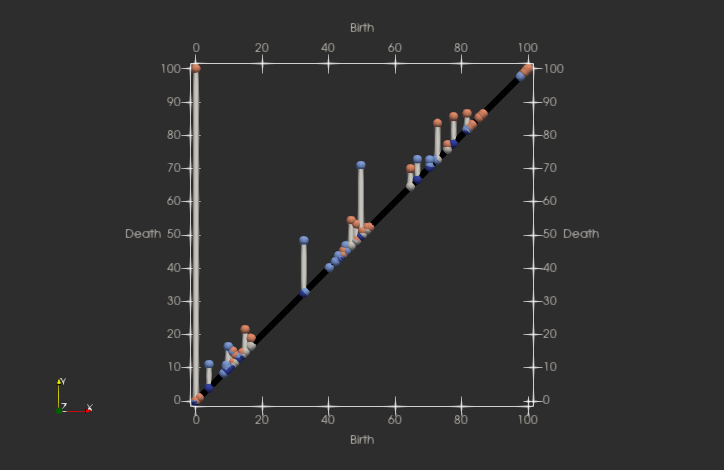

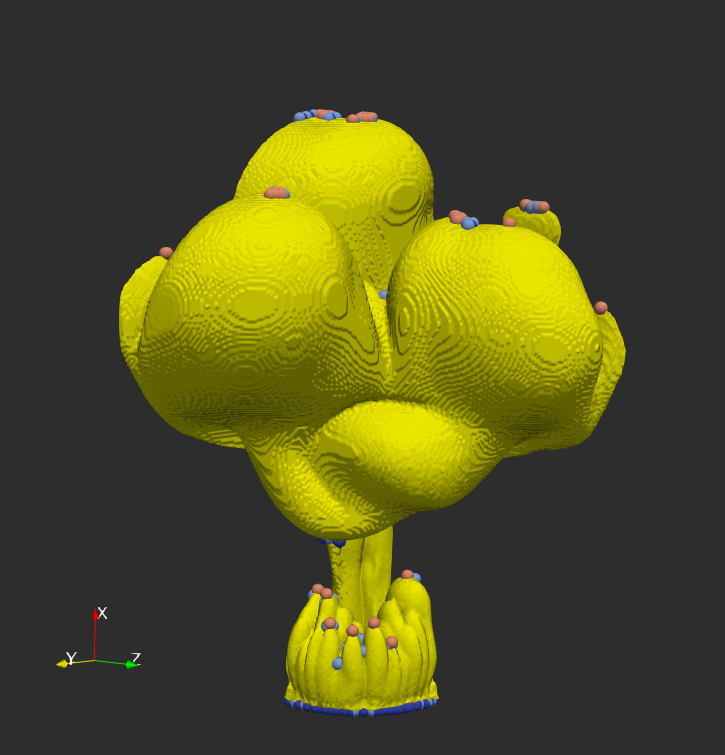

## 2nd Split

#### Persitence Curve of Second Split

In [ ]:
# find source
csafe_heptane_302x302x302_uint8raw = FindSource('csafe_heptane_302x302x302_uint8.raw')

# create a new 'Extract Subset'
extractSubset2 = ExtractSubset(registrationName='ExtractSubset2', Input=csafe_heptane_302x302x302_uint8raw)
extractSubset2.VOI = [0, 301, 0, 301, 0, 301]

# find source
contour1 = FindSource('Contour1')

# find source
tTKGeometrySmoother1 = FindSource('TTKGeometrySmoother1')

# find source
elevation1 = FindSource('Elevation1')

# find source
tTKPersistenceDiagram1 = FindSource('TTKPersistenceDiagram1')

# find source
tTKPersistenceCurve1 = FindSource('TTKPersistenceCurve1')

# find source
extractSurface1 = FindSource('ExtractSurface1')

# find source
threshold1 = FindSource('Threshold1')

# find source
tube1 = FindSource('Tube1')

# find source
pairs1 = FindSource('pairs1')

# find source
extractSubset1 = FindSource('ExtractSubset1')

# Properties modified on extractSubset2
extractSubset2.VOI = [0, 301, 150, 301, 0, 150]

UpdatePipeline(time=0.0, proxy=extractSubset2)

# find source
tetrahedralize1 = FindSource('Tetrahedralize1')

# find source
tTKTopologicalSimplification1 = FindSource('TTKTopologicalSimplification1')

# find source
persistenceThreshold1 = FindSource('persistenceThreshold1')

# find source
tTKIcospheresFromPoints1 = FindSource('TTKIcospheresFromPoints1')

# find source
extractSurface2 = FindSource('ExtractSurface2')

# find source
tube2 = FindSource('Tube2')

# find source
tTKScalarFieldCriticalPoints1 = FindSource('TTKScalarFieldCriticalPoints1')

# find source
tTKIcospheresFromPoints2 = FindSource('TTKIcospheresFromPoints2')

# create a new 'Contour'
contour2 = Contour(registrationName='Contour2', Input=extractSubset2)
contour2.ContourBy = ['POINTS', 'ImageFile']
contour2.Isosurfaces = [127.5]
contour2.PointMergeMethod = 'Uniform Binning'

# Properties modified on contour2
contour2.Isosurfaces = [1.0]

UpdatePipeline(time=0.0, proxy=contour2)

# create a new 'Tetrahedralize'
tetrahedralize2 = Tetrahedralize(registrationName='Tetrahedralize2', Input=contour2)

UpdatePipeline(time=0.0, proxy=tetrahedralize2)

# create a new 'TTK GeometrySmoother'
tTKGeometrySmoother2 = TTKGeometrySmoother(registrationName='TTKGeometrySmoother2', Input=tetrahedralize2)
tTKGeometrySmoother2.InputMaskField = ['POINTS', 'ImageFile']

# Properties modified on tTKGeometrySmoother2
tTKGeometrySmoother2.IterationNumber = 3

UpdatePipeline(time=0.0, proxy=tTKGeometrySmoother2)

# create a new 'Elevation'
elevation2 = Elevation(registrationName='Elevation2', Input=tTKGeometrySmoother2)
elevation2.LowPoint = [-150.98956298828125, -0.7868634462356567, -150.96714782714844]
elevation2.HighPoint = [123.4972152709961, 149.97642517089844, -1.1351851224899292]

# Properties modified on elevation2
elevation2.ScalarRange = [0.0, 100.0]
elevation2.LowPoint = [-150.98956298828125, 74.59478086233139, -76.05116647481918]
elevation2.HighPoint = [123.4972152709961, 74.59478086233139, -76.05116647481918]

UpdatePipeline(time=0.0, proxy=elevation2)

# toggle 3D widget visibility (only when running from the GUI)
Hide3DWidgets(proxy=elevation2)

# set active source
SetActiveSource(extractSubset2)

# set active source
SetActiveSource(elevation2)

# create a new 'TTK PersistenceCurve'
tTKPersistenceCurve2 = TTKPersistenceCurve(registrationName='TTKPersistenceCurve2', Input=elevation2)
tTKPersistenceCurve2.ScalarField = ['POINTS', 'Elevation']
tTKPersistenceCurve2.InputOffsetField = ['POINTS', 'Elevation']

UpdatePipeline(time=0.0, proxy=tTKPersistenceCurve2)

UpdatePipeline(time=0.0, proxy=tTKPersistenceCurve2)

UpdatePipeline(time=0.0, proxy=tTKPersistenceCurve2)

UpdatePipeline(time=0.0, proxy=tTKPersistenceCurve2)

# set active source
SetActiveSource(tTKPersistenceCurve2)

UpdatePipeline(time=0.0, proxy=tTKPersistenceCurve2)

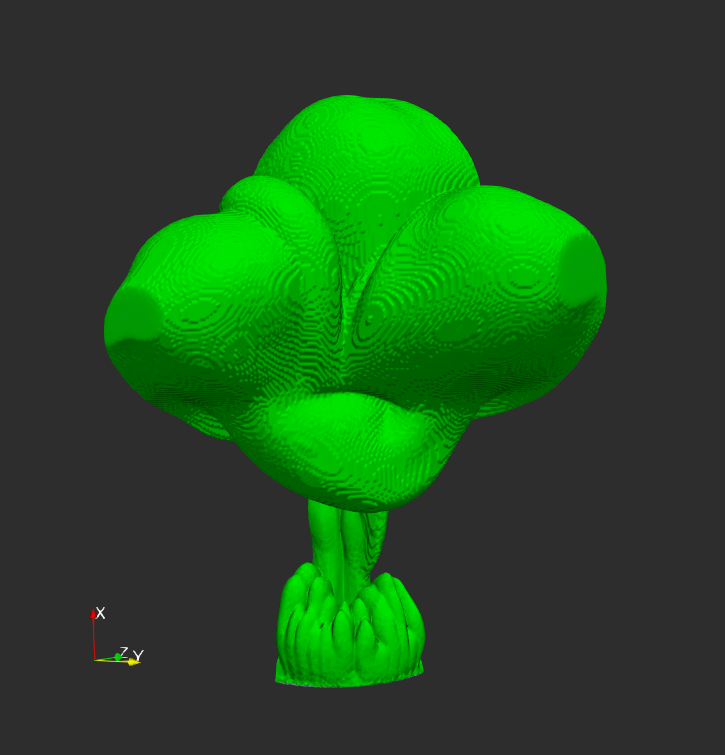

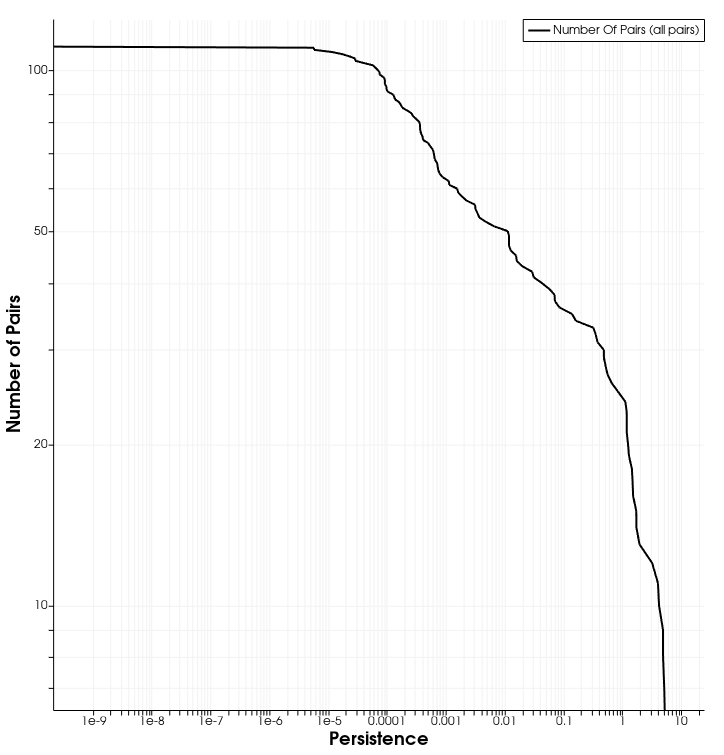

#### Persistence Diagram and Critical Points of Second Split with smoothener set to 3

In [ ]:
# find source
elevation2 = FindSource('Elevation2')

# set active source
SetActiveSource(elevation2)

# create a new 'TTK PersistenceDiagram'
tTKPersistenceDiagram2 = TTKPersistenceDiagram(registrationName='TTKPersistenceDiagram2', Input=elevation2)
tTKPersistenceDiagram2.ScalarField = ['POINTS', 'Elevation']
tTKPersistenceDiagram2.InputOffsetField = ['POINTS', 'Elevation']

# find source
contour2 = FindSource('Contour2')

# find source
contour1 = FindSource('Contour1')

# find source
tTKGeometrySmoother1 = FindSource('TTKGeometrySmoother1')

# find source
elevation1 = FindSource('Elevation1')

# find source
tTKPersistenceDiagram1 = FindSource('TTKPersistenceDiagram1')

# find source
tTKPersistenceCurve1 = FindSource('TTKPersistenceCurve1')

# find source
extractSurface1 = FindSource('ExtractSurface1')

# find source
threshold1 = FindSource('Threshold1')

# find source
tube1 = FindSource('Tube1')

# find source
pairs1 = FindSource('pairs1')

# find source
csafe_heptane_302x302x302_uint8raw = FindSource('csafe_heptane_302x302x302_uint8.raw')

# find source
tTKGeometrySmoother2 = FindSource('TTKGeometrySmoother2')

# find source
tetrahedralize2 = FindSource('Tetrahedralize2')

# find source
extractSubset1 = FindSource('ExtractSubset1')

# find source
extractSubset2 = FindSource('ExtractSubset2')

# find source
tetrahedralize1 = FindSource('Tetrahedralize1')

# find source
tTKTopologicalSimplification1 = FindSource('TTKTopologicalSimplification1')

# find source
persistenceThreshold1 = FindSource('persistenceThreshold1')

# find source
tTKIcospheresFromPoints1 = FindSource('TTKIcospheresFromPoints1')

# find source
extractSurface2 = FindSource('ExtractSurface2')

# find source
tube2 = FindSource('Tube2')

# find source
tTKScalarFieldCriticalPoints1 = FindSource('TTKScalarFieldCriticalPoints1')

# find source
tTKIcospheresFromPoints2 = FindSource('TTKIcospheresFromPoints2')

# find source
tTKPersistenceCurve2 = FindSource('TTKPersistenceCurve2')

UpdatePipeline(time=0.0, proxy=tTKPersistenceDiagram2)

# create a new 'Threshold'
threshold2 = Threshold(registrationName='Threshold2', Input=tTKPersistenceDiagram2)
threshold2.Scalars = ['POINTS', 'CriticalType']
threshold2.UpperThreshold = 3.0

# Properties modified on threshold2
threshold2.Scalars = ['CELLS', 'PairIdentifier']
threshold2.LowerThreshold = -1.0
threshold2.UpperThreshold = -0.1

UpdatePipeline(time=0.0, proxy=threshold2)

# create a new 'Extract Surface'
extractSurface3 = ExtractSurface(registrationName='ExtractSurface3', Input=threshold2)

UpdatePipeline(time=0.0, proxy=extractSurface3)

# create a new 'Tube'
tube3 = Tube(registrationName='Tube3', Input=extractSurface3)
tube3.Scalars = ['POINTS', 'CriticalType']
tube3.Vectors = ['POINTS', 'Coordinates']
tube3.Radius = 0.9981885528564454

UpdatePipeline(time=0.0, proxy=tube3)

# set active source
SetActiveSource(tTKPersistenceDiagram2)

# create a new 'Threshold'
threshold3 = Threshold(registrationName='Threshold3', Input=tTKPersistenceDiagram2)
threshold3.Scalars = ['POINTS', 'CriticalType']
threshold3.UpperThreshold = 3.0

# Properties modified on threshold3
threshold3.Scalars = ['CELLS', 'PairIdentifier']
threshold3.UpperThreshold = 114.0

UpdatePipeline(time=0.0, proxy=threshold3)

RenameProxy('pairs2', 'sources', threshold3)

# rename source object
RenameSource('pairs2', threshold3)

# create a new 'Threshold'
threshold3_1 = Threshold(registrationName='Threshold3', Input=threshold3)
threshold3_1.Scalars = ['POINTS', 'CriticalType']
threshold3_1.UpperThreshold = 3.0

# Properties modified on threshold3_1
threshold3_1.Scalars = ['CELLS', 'Persistence']
threshold3_1.UpperThreshold = 100.0

UpdatePipeline(time=0.0, proxy=threshold3_1)

RenameProxy('persistenceThreshold2', 'sources', threshold3_1)

# rename source object
RenameSource('persistenceThreshold2', threshold3_1)

# create a new 'Extract Surface'
extractSurface4 = ExtractSurface(registrationName='ExtractSurface4', Input=threshold3_1)

UpdatePipeline(time=0.0, proxy=extractSurface4)

# create a new 'Tube'
tube4 = Tube(registrationName='Tube4', Input=extractSurface4)
tube4.Scalars = ['POINTS', 'CriticalType']
tube4.Vectors = ['POINTS', 'Coordinates']

UpdatePipeline(time=0.0, proxy=tube4)

# set active source
SetActiveSource(threshold3_1)

# create a new 'TTK IcospheresFromPoints'
tTKIcospheresFromPoints3 = TTKIcospheresFromPoints(registrationName='TTKIcospheresFromPoints3', Input=threshold3_1)

# Properties modified on tTKIcospheresFromPoints3
tTKIcospheresFromPoints3.Radius = 1.5

UpdatePipeline(time=0.0, proxy=tTKIcospheresFromPoints3)

# set active source
SetActiveSource(tTKPersistenceDiagram2)

# set active source
SetActiveSource(elevation2)

# create a new 'TTK TopologicalSimplification'
tTKTopologicalSimplification2 = TTKTopologicalSimplification(registrationName='TTKTopologicalSimplification2', Domain=elevation2,
    Constraints=threshold3_1)
tTKTopologicalSimplification2.ScalarField = ['POINTS', 'Elevation']
tTKTopologicalSimplification2.InputOffsetField = ['POINTS', 'Elevation']
tTKTopologicalSimplification2.VertexIdentifierField = ['POINTS', 'CriticalType']

UpdatePipeline(time=0.0, proxy=tTKTopologicalSimplification2)

# create a new 'TTK ScalarFieldCriticalPoints'
tTKScalarFieldCriticalPoints2 = TTKScalarFieldCriticalPoints(registrationName='TTKScalarFieldCriticalPoints2', Input=tTKTopologicalSimplification2)
tTKScalarFieldCriticalPoints2.ScalarField = ['POINTS', 'Elevation']
tTKScalarFieldCriticalPoints2.InputOffsetField = ['POINTS', 'Elevation']

UpdatePipeline(time=0.0, proxy=tTKScalarFieldCriticalPoints2)

# create a new 'TTK IcospheresFromPoints'
tTKIcospheresFromPoints4 = TTKIcospheresFromPoints(registrationName='TTKIcospheresFromPoints4', Input=tTKScalarFieldCriticalPoints2)

# Properties modified on tTKIcospheresFromPoints4
tTKIcospheresFromPoints4.Radius = 3.0

UpdatePipeline(time=0.0, proxy=tTKIcospheresFromPoints4)

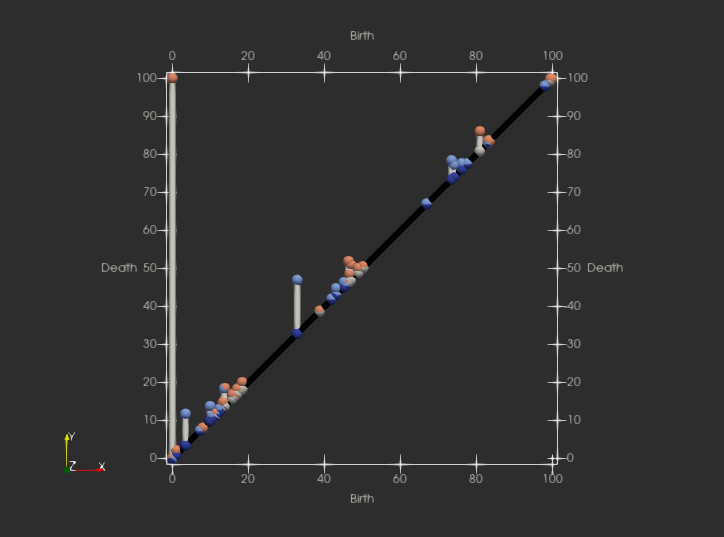

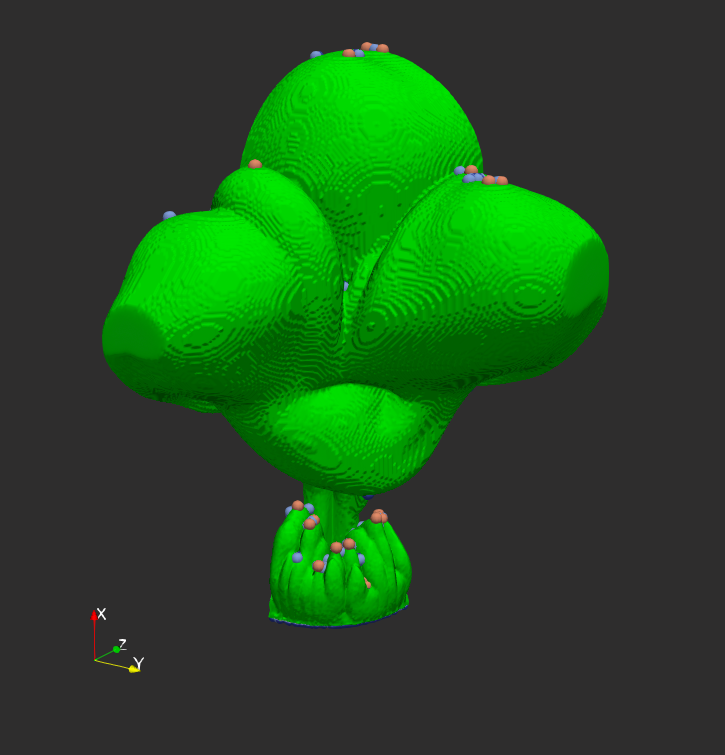

## 3rd Split

#### Persitence Curve of Third Split

In [ ]:
# find source
csafe_heptane_302x302x302_uint8raw = FindSource('csafe_heptane_302x302x302_uint8.raw')

# create a new 'Extract Subset'
extractSubset3 = ExtractSubset(registrationName='ExtractSubset3', Input=csafe_heptane_302x302x302_uint8raw)
extractSubset3.VOI = [0, 301, 0, 301, 0, 301]

# find source
contour2 = FindSource('Contour2')

# find source
contour1 = FindSource('Contour1')

# find source
tTKGeometrySmoother1 = FindSource('TTKGeometrySmoother1')

# find source
elevation1 = FindSource('Elevation1')

# find source
tTKPersistenceDiagram1 = FindSource('TTKPersistenceDiagram1')

# find source
tTKPersistenceCurve1 = FindSource('TTKPersistenceCurve1')

# find source
elevation2 = FindSource('Elevation2')

# find source
extractSurface1 = FindSource('ExtractSurface1')

# find source
threshold2 = FindSource('Threshold2')

# find source
threshold1 = FindSource('Threshold1')

# find source
tube1 = FindSource('Tube1')

# find source
extractSurface3 = FindSource('ExtractSurface3')

# find source
pairs1 = FindSource('pairs1')

# find source
tTKGeometrySmoother2 = FindSource('TTKGeometrySmoother2')

# find source
tetrahedralize2 = FindSource('Tetrahedralize2')

# find source
extractSubset1 = FindSource('ExtractSubset1')

# find source
extractSubset2 = FindSource('ExtractSubset2')

# find source
tetrahedralize1 = FindSource('Tetrahedralize1')

# find source
tTKTopologicalSimplification1 = FindSource('TTKTopologicalSimplification1')

# find source
persistenceThreshold1 = FindSource('persistenceThreshold1')

# find source
pairs2 = FindSource('pairs2')

# find source
tTKIcospheresFromPoints1 = FindSource('TTKIcospheresFromPoints1')

# find source
tTKTopologicalSimplification2 = FindSource('TTKTopologicalSimplification2')

# find source
extractSurface2 = FindSource('ExtractSurface2')

# find source
tube2 = FindSource('Tube2')

# find source
tube3 = FindSource('Tube3')

# find source
tTKScalarFieldCriticalPoints1 = FindSource('TTKScalarFieldCriticalPoints1')

# find source
tTKIcospheresFromPoints2 = FindSource('TTKIcospheresFromPoints2')

# find source
tTKPersistenceCurve2 = FindSource('TTKPersistenceCurve2')

# find source
tTKPersistenceDiagram2 = FindSource('TTKPersistenceDiagram2')

# find source
persistenceThreshold2 = FindSource('persistenceThreshold2')

# Properties modified on extractSubset3
extractSubset3.VOI = [0, 301, 0, 150, 150, 301]

UpdatePipeline(time=0.0, proxy=extractSubset3)

# find source
extractSurface4 = FindSource('ExtractSurface4')

# find source
tube4 = FindSource('Tube4')

# find source
tTKIcospheresFromPoints3 = FindSource('TTKIcospheresFromPoints3')

# find source
tTKScalarFieldCriticalPoints2 = FindSource('TTKScalarFieldCriticalPoints2')

# find source
tTKIcospheresFromPoints4 = FindSource('TTKIcospheresFromPoints4')

# create a new 'Contour'
contour3 = Contour(registrationName='Contour3', Input=extractSubset3)
contour3.ContourBy = ['POINTS', 'ImageFile']
contour3.Isosurfaces = [127.5]
contour3.PointMergeMethod = 'Uniform Binning'

# Properties modified on contour3
contour3.Isosurfaces = [1.0]

UpdatePipeline(time=0.0, proxy=contour3)

# create a new 'Tetrahedralize'
tetrahedralize3 = Tetrahedralize(registrationName='Tetrahedralize3', Input=contour3)

UpdatePipeline(time=0.0, proxy=tetrahedralize3)

# create a new 'TTK GeometrySmoother'
tTKGeometrySmoother3 = TTKGeometrySmoother(registrationName='TTKGeometrySmoother3', Input=tetrahedralize3)
tTKGeometrySmoother3.InputMaskField = ['POINTS', 'ImageFile']

# Properties modified on tTKGeometrySmoother3
tTKGeometrySmoother3.IterationNumber = 10

UpdatePipeline(time=0.0, proxy=tTKGeometrySmoother3)

# create a new 'Elevation'
elevation3 = Elevation(registrationName='Elevation3', Input=tTKGeometrySmoother3)
elevation3.LowPoint = [-150.98837280273438, -150.97291564941406, -0.9698004126548767]
elevation3.HighPoint = [116.39496612548828, -1.4198156595230103, 149.9615020751953]

# toggle 3D widget visibility (only when running from the GUI)
Hide3DWidgets(proxy=elevation3)

# toggle 3D widget visibility (only when running from the GUI)
Show3DWidgets(proxy=elevation3)

# Properties modified on elevation3
elevation3.ScalarRange = [0.0, 100.0]
elevation3.LowPoint = [-150.98837280273438, -76.19636565446854, 74.49585083127022]
elevation3.HighPoint = [116.39496612548828, -76.19636565446854, 74.49585083127022]

UpdatePipeline(time=0.0, proxy=elevation3)

# toggle 3D widget visibility (only when running from the GUI)
Hide3DWidgets(proxy=elevation3)

# set active source
SetActiveSource(extractSubset3)

# set active source
SetActiveSource(elevation3)

# create a new 'TTK PersistenceCurve'
tTKPersistenceCurve3 = TTKPersistenceCurve(registrationName='TTKPersistenceCurve3', Input=elevation3)
tTKPersistenceCurve3.ScalarField = ['POINTS', 'Elevation']
tTKPersistenceCurve3.InputOffsetField = ['POINTS', 'Elevation']

UpdatePipeline(time=0.0, proxy=tTKPersistenceCurve3)

UpdatePipeline(time=0.0, proxy=tTKPersistenceCurve3)

UpdatePipeline(time=0.0, proxy=tTKPersistenceCurve3)

UpdatePipeline(time=0.0, proxy=tTKPersistenceCurve3)

# set active source
SetActiveSource(tTKPersistenceCurve3)

UpdatePipeline(time=0.0, proxy=tTKPersistenceCurve3)

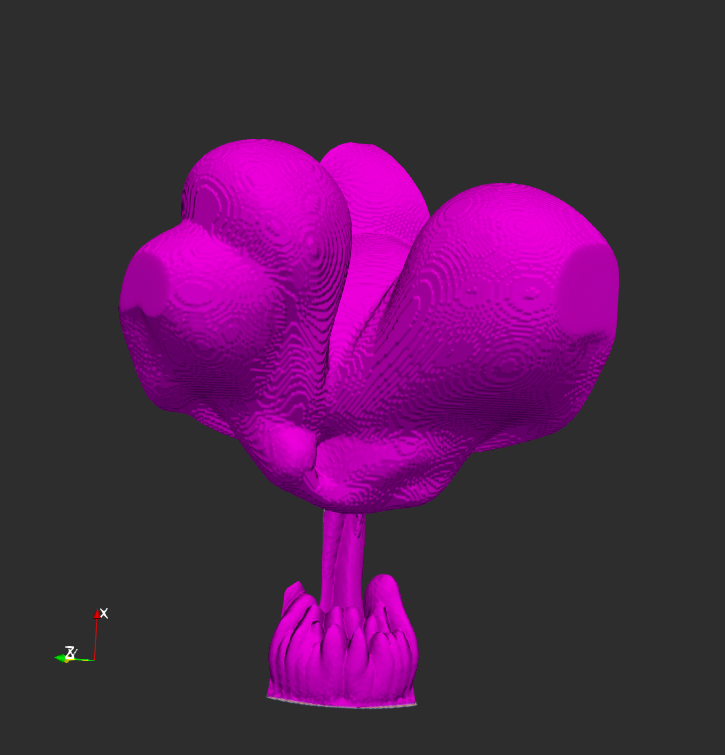

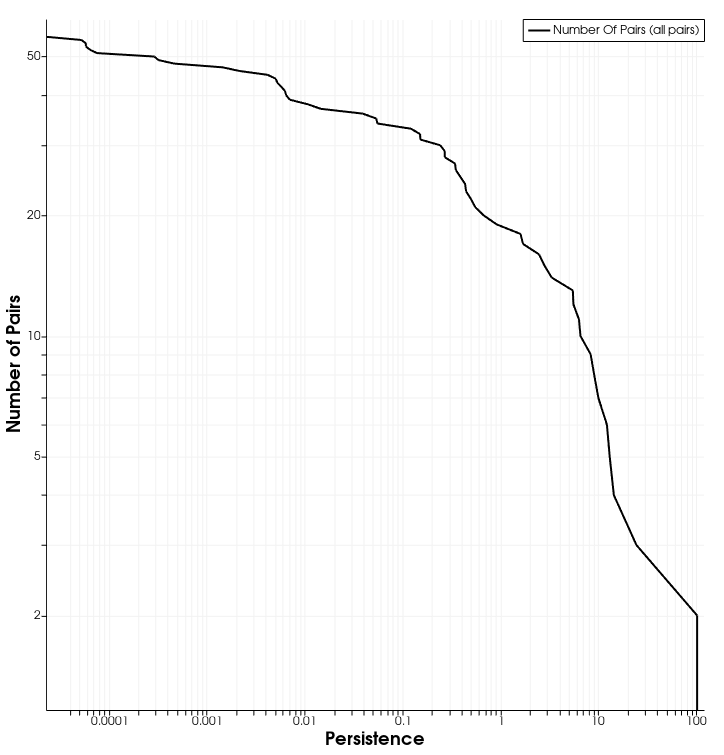

#### Persistence Diagram and Critical Points of Third Split with smoothener set to 10

In [ ]:
# find source
elevation3 = FindSource('Elevation3')

# set active source
SetActiveSource(elevation3)

# create a new 'TTK PersistenceDiagram'
tTKPersistenceDiagram3 = TTKPersistenceDiagram(registrationName='TTKPersistenceDiagram3', Input=elevation3)
tTKPersistenceDiagram3.ScalarField = ['POINTS', 'Elevation']
tTKPersistenceDiagram3.InputOffsetField = ['POINTS', 'Elevation']

# find source
contour2 = FindSource('Contour2')

# find source
contour1 = FindSource('Contour1')

# find source
contour3 = FindSource('Contour3')

# find source
tTKGeometrySmoother1 = FindSource('TTKGeometrySmoother1')

# find source
elevation1 = FindSource('Elevation1')

# find source
tTKPersistenceDiagram1 = FindSource('TTKPersistenceDiagram1')

# find source
tTKPersistenceCurve1 = FindSource('TTKPersistenceCurve1')

# find source
elevation2 = FindSource('Elevation2')

# find source
extractSurface1 = FindSource('ExtractSurface1')

# find source
threshold2 = FindSource('Threshold2')

# find source
threshold1 = FindSource('Threshold1')

# find source
tube1 = FindSource('Tube1')

UpdatePipeline(time=0.0, proxy=tTKPersistenceDiagram3)

# find source
extractSurface3 = FindSource('ExtractSurface3')

# find source
tTKGeometrySmoother3 = FindSource('TTKGeometrySmoother3')

# find source
pairs1 = FindSource('pairs1')

# find source
tetrahedralize3 = FindSource('Tetrahedralize3')

# find source
csafe_heptane_302x302x302_uint8raw = FindSource('csafe_heptane_302x302x302_uint8.raw')

# find source
tTKGeometrySmoother2 = FindSource('TTKGeometrySmoother2')

# find source
tetrahedralize2 = FindSource('Tetrahedralize2')

# find source
extractSubset1 = FindSource('ExtractSubset1')

# find source
extractSubset2 = FindSource('ExtractSubset2')

# find source
tetrahedralize1 = FindSource('Tetrahedralize1')

# find source
tTKTopologicalSimplification1 = FindSource('TTKTopologicalSimplification1')

# find source
persistenceThreshold1 = FindSource('persistenceThreshold1')

# find source
pairs2 = FindSource('pairs2')

# find source
tTKIcospheresFromPoints1 = FindSource('TTKIcospheresFromPoints1')

# find source
tTKTopologicalSimplification2 = FindSource('TTKTopologicalSimplification2')

# find source
extractSurface2 = FindSource('ExtractSurface2')

# find source
tube2 = FindSource('Tube2')

# find source
tube3 = FindSource('Tube3')

# find source
tTKPersistenceCurve3 = FindSource('TTKPersistenceCurve3')

# find source
tTKScalarFieldCriticalPoints1 = FindSource('TTKScalarFieldCriticalPoints1')

# find source
tTKIcospheresFromPoints2 = FindSource('TTKIcospheresFromPoints2')

# find source
tTKPersistenceCurve2 = FindSource('TTKPersistenceCurve2')

# find source
tTKPersistenceDiagram2 = FindSource('TTKPersistenceDiagram2')

# find source
persistenceThreshold2 = FindSource('persistenceThreshold2')

# find source
extractSubset3 = FindSource('ExtractSubset3')

# find source
extractSurface4 = FindSource('ExtractSurface4')

# find source
tube4 = FindSource('Tube4')

# find source
tTKIcospheresFromPoints3 = FindSource('TTKIcospheresFromPoints3')

# find source
tTKScalarFieldCriticalPoints2 = FindSource('TTKScalarFieldCriticalPoints2')

# find source
tTKIcospheresFromPoints4 = FindSource('TTKIcospheresFromPoints4')

# create a new 'Threshold'
threshold3 = Threshold(registrationName='Threshold3', Input=tTKPersistenceDiagram3)
threshold3.Scalars = ['POINTS', 'CriticalType']
threshold3.UpperThreshold = 3.0

# Properties modified on threshold3
threshold3.Scalars = ['CELLS', 'PairIdentifier']
threshold3.LowerThreshold = -1.0
threshold3.UpperThreshold = -0.1

UpdatePipeline(time=0.0, proxy=threshold3)

# create a new 'Extract Surface'
extractSurface5 = ExtractSurface(registrationName='ExtractSurface5', Input=threshold3)

UpdatePipeline(time=0.0, proxy=extractSurface5)

# create a new 'Tube'
tube5 = Tube(registrationName='Tube5', Input=extractSurface5)
tube5.Scalars = ['POINTS', 'CriticalType']
tube5.Vectors = ['POINTS', 'Coordinates']
tube5.Radius = 0.7962595367431641

UpdatePipeline(time=0.0, proxy=tube5)

# set active source
SetActiveSource(tTKPersistenceDiagram3)

# create a new 'Threshold'
threshold4 = Threshold(registrationName='Threshold4', Input=tTKPersistenceDiagram3)
threshold4.Scalars = ['POINTS', 'CriticalType']
threshold4.UpperThreshold = 3.0

# Properties modified on threshold4
threshold4.Scalars = ['CELLS', 'PairIdentifier']
threshold4.UpperThreshold = 56.0

UpdatePipeline(time=0.0, proxy=threshold4)

RenameProxy('pairs3', 'sources', threshold4)

# rename source object
RenameSource('pairs3', threshold4)

# create a new 'Threshold'
threshold4_1 = Threshold(registrationName='Threshold4', Input=threshold4)
threshold4_1.Scalars = ['POINTS', 'CriticalType']
threshold4_1.UpperThreshold = 3.0

# Properties modified on threshold4_1
threshold4_1.Scalars = ['CELLS', 'Persistence']
threshold4_1.UpperThreshold = 100.0

UpdatePipeline(time=0.0, proxy=threshold4_1)

RenameProxy('persistenceThreshold3', 'sources', threshold4_1)

# rename source object
RenameSource('persistenceThreshold3', threshold4_1)

# create a new 'Extract Surface'
extractSurface6 = ExtractSurface(registrationName='ExtractSurface6', Input=threshold4_1)

UpdatePipeline(time=0.0, proxy=extractSurface6)

# create a new 'Tube'
tube6 = Tube(registrationName='Tube6', Input=extractSurface6)
tube6.Scalars = ['POINTS', 'CriticalType']
tube6.Vectors = ['POINTS', 'Coordinates']

UpdatePipeline(time=0.0, proxy=tube6)

# set active source
SetActiveSource(threshold4_1)

# create a new 'TTK IcospheresFromPoints'
tTKIcospheresFromPoints5 = TTKIcospheresFromPoints(registrationName='TTKIcospheresFromPoints5', Input=threshold4_1)

# Properties modified on tTKIcospheresFromPoints5
tTKIcospheresFromPoints5.Radius = 1.5

UpdatePipeline(time=0.0, proxy=tTKIcospheresFromPoints5)

# set active source
SetActiveSource(tTKPersistenceDiagram3)

# set active source
SetActiveSource(elevation3)

# create a new 'TTK TopologicalSimplification'
tTKTopologicalSimplification3 = TTKTopologicalSimplification(registrationName='TTKTopologicalSimplification3', Domain=elevation3,
    Constraints=threshold4_1)
tTKTopologicalSimplification3.ScalarField = ['POINTS', 'Elevation']
tTKTopologicalSimplification3.InputOffsetField = ['POINTS', 'Elevation']
tTKTopologicalSimplification3.VertexIdentifierField = ['POINTS', 'CriticalType']

UpdatePipeline(time=0.0, proxy=tTKTopologicalSimplification3)

# create a new 'TTK ScalarFieldCriticalPoints'
tTKScalarFieldCriticalPoints3 = TTKScalarFieldCriticalPoints(registrationName='TTKScalarFieldCriticalPoints3', Input=tTKTopologicalSimplification3)
tTKScalarFieldCriticalPoints3.ScalarField = ['POINTS', 'Elevation']
tTKScalarFieldCriticalPoints3.InputOffsetField = ['POINTS', 'Elevation']

UpdatePipeline(time=0.0, proxy=tTKScalarFieldCriticalPoints3)

# create a new 'TTK IcospheresFromPoints'
tTKIcospheresFromPoints6 = TTKIcospheresFromPoints(registrationName='TTKIcospheresFromPoints6', Input=tTKScalarFieldCriticalPoints3)

# Properties modified on tTKIcospheresFromPoints6
tTKIcospheresFromPoints6.Radius = 4.0

UpdatePipeline(time=0.0, proxy=tTKIcospheresFromPoints6)

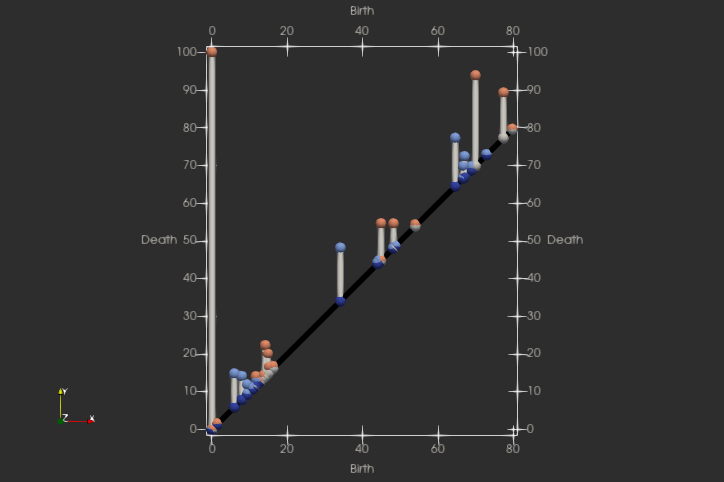

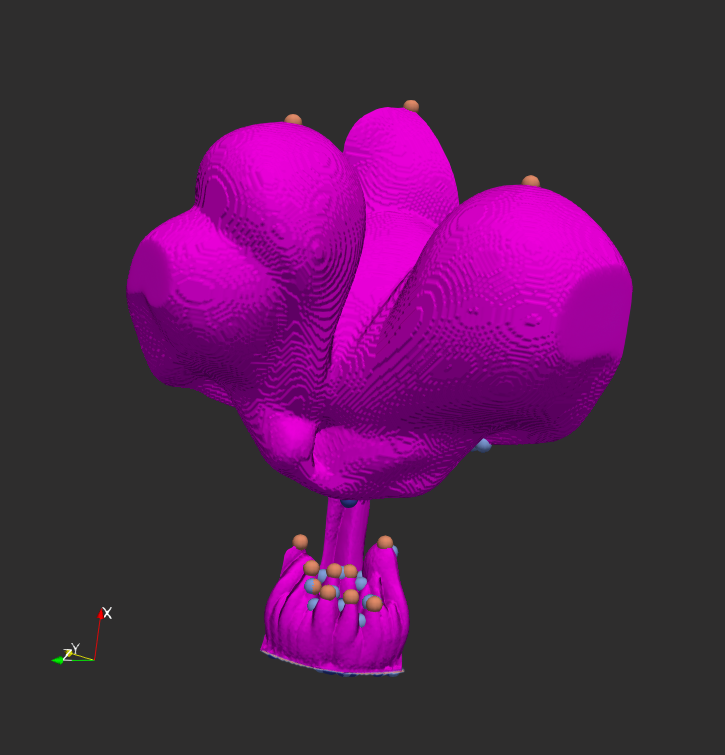

## 4th Split

#### Fourth Split with No Critical Points 

In [ ]:
# find source
csafe_heptane_302x302x302_uint8raw = FindSource('csafe_heptane_302x302x302_uint8.raw')

# create a new 'Extract Subset'
extractSubset4 = ExtractSubset(registrationName='ExtractSubset4', Input=csafe_heptane_302x302x302_uint8raw)
extractSubset4.VOI = [0, 301, 0, 301, 0, 301]

# Properties modified on extractSubset4
extractSubset4.VOI = [0, 301, 0, 150, 0, 150]

UpdatePipeline(time=0.0, proxy=extractSubset4)

# find source
extractSubset1 = FindSource('ExtractSubset1')

# find source
tTKTopologicalSimplification1 = FindSource('TTKTopologicalSimplification1')

# find source
tTKScalarFieldCriticalPoints1 = FindSource('TTKScalarFieldCriticalPoints1')

# find source
tTKIcospheresFromPoints2 = FindSource('TTKIcospheresFromPoints2')

# find source
tTKTopologicalSimplification2 = FindSource('TTKTopologicalSimplification2')

# find source
tTKScalarFieldCriticalPoints2 = FindSource('TTKScalarFieldCriticalPoints2')

# find source
tTKIcospheresFromPoints4 = FindSource('TTKIcospheresFromPoints4')

# find source
tTKTopologicalSimplification3 = FindSource('TTKTopologicalSimplification3')

# find source
tTKIcospheresFromPoints6 = FindSource('TTKIcospheresFromPoints6')

# find source
tTKScalarFieldCriticalPoints3 = FindSource('TTKScalarFieldCriticalPoints3')

# create a new 'Contour'
contour4 = Contour(registrationName='Contour4', Input=extractSubset4)
contour4.ContourBy = ['POINTS', 'ImageFile']
contour4.Isosurfaces = [127.5]
contour4.PointMergeMethod = 'Uniform Binning'

# Properties modified on contour4
contour4.Isosurfaces = [1.0]

UpdatePipeline(time=0.0, proxy=contour4)

# create a new 'Tetrahedralize'
tetrahedralize4 = Tetrahedralize(registrationName='Tetrahedralize4', Input=contour4)

UpdatePipeline(time=0.0, proxy=tetrahedralize4)

# create a new 'TTK GeometrySmoother'
tTKGeometrySmoother4 = TTKGeometrySmoother(registrationName='TTKGeometrySmoother4', Input=tetrahedralize4)
tTKGeometrySmoother4.InputMaskField = ['POINTS', 'ImageFile']

# Properties modified on tTKGeometrySmoother4
tTKGeometrySmoother4.IterationNumber = 30

UpdatePipeline(time=0.0, proxy=tTKGeometrySmoother4)

# create a new 'Elevation'
elevation4 = Elevation(registrationName='Elevation4', Input=tTKGeometrySmoother4)
elevation4.LowPoint = [-150.98587036132812, -150.91961669921875, -150.5155792236328]
elevation4.HighPoint = [116.04230499267578, -1.5670303106307983, -1.8230243921279907]

# toggle 3D widget visibility (only when running from the GUI)
Hide3DWidgets(proxy=elevation4)

# Properties modified on elevation4
elevation4.ScalarRange = [0.0, 100.0]
elevation4.LowPoint = [-150.98587036132812, -76.24332350492477, -76.1693018078804]
elevation4.HighPoint = [116.04230499267578, -76.24332350492477, -76.1693018078804]

UpdatePipeline(time=0.0, proxy=elevation4)

# set active source
SetActiveSource(extractSubset4)

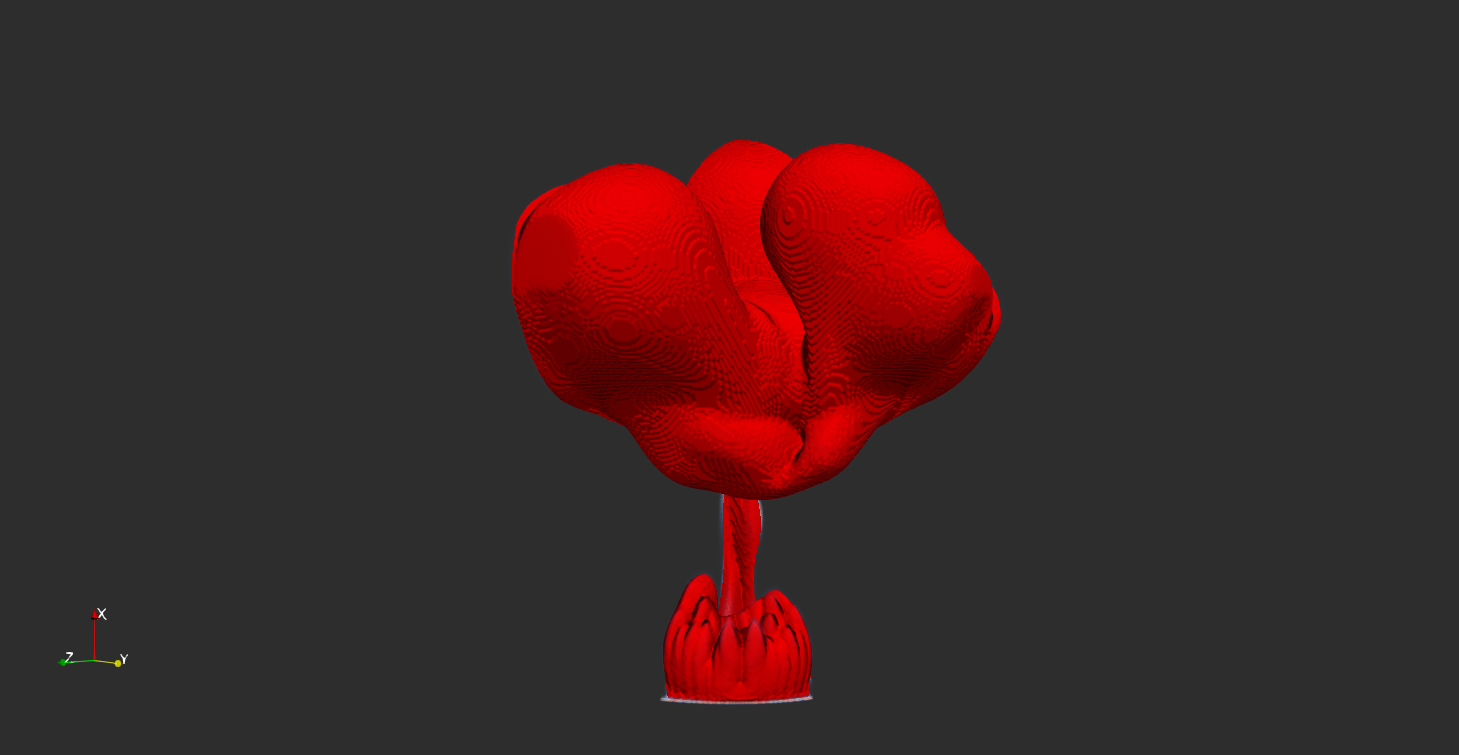

## All Together

In [ ]:
# find source
tTKIcospheresFromPoints6 = FindSource('TTKIcospheresFromPoints6')

# set active source
SetActiveSource(tTKIcospheresFromPoints6)

# find source
tTKScalarFieldCriticalPoints3 = FindSource('TTKScalarFieldCriticalPoints3')

# set active source
SetActiveSource(tTKScalarFieldCriticalPoints3)

# find source
tTKTopologicalSimplification3 = FindSource('TTKTopologicalSimplification3')

# set active source
SetActiveSource(tTKTopologicalSimplification3)

# set active source
SetActiveSource(tTKTopologicalSimplification3)

# find source
tTKIcospheresFromPoints4 = FindSource('TTKIcospheresFromPoints4')

# set active source
SetActiveSource(tTKIcospheresFromPoints4)

# find source
tTKScalarFieldCriticalPoints2 = FindSource('TTKScalarFieldCriticalPoints2')

# set active source
SetActiveSource(tTKScalarFieldCriticalPoints2)

# find source
tTKTopologicalSimplification2 = FindSource('TTKTopologicalSimplification2')

# set active source
SetActiveSource(tTKTopologicalSimplification2)

# set active source
SetActiveSource(tTKTopologicalSimplification2)

# find source
tTKIcospheresFromPoints2 = FindSource('TTKIcospheresFromPoints2')

# set active source
SetActiveSource(tTKIcospheresFromPoints2)

# find source
tTKScalarFieldCriticalPoints1 = FindSource('TTKScalarFieldCriticalPoints1')

# set active source
SetActiveSource(tTKScalarFieldCriticalPoints1)

# find source
tTKTopologicalSimplification1 = FindSource('TTKTopologicalSimplification1')

# set active source
SetActiveSource(tTKTopologicalSimplification1)

# set active source
SetActiveSource(tTKTopologicalSimplification1)

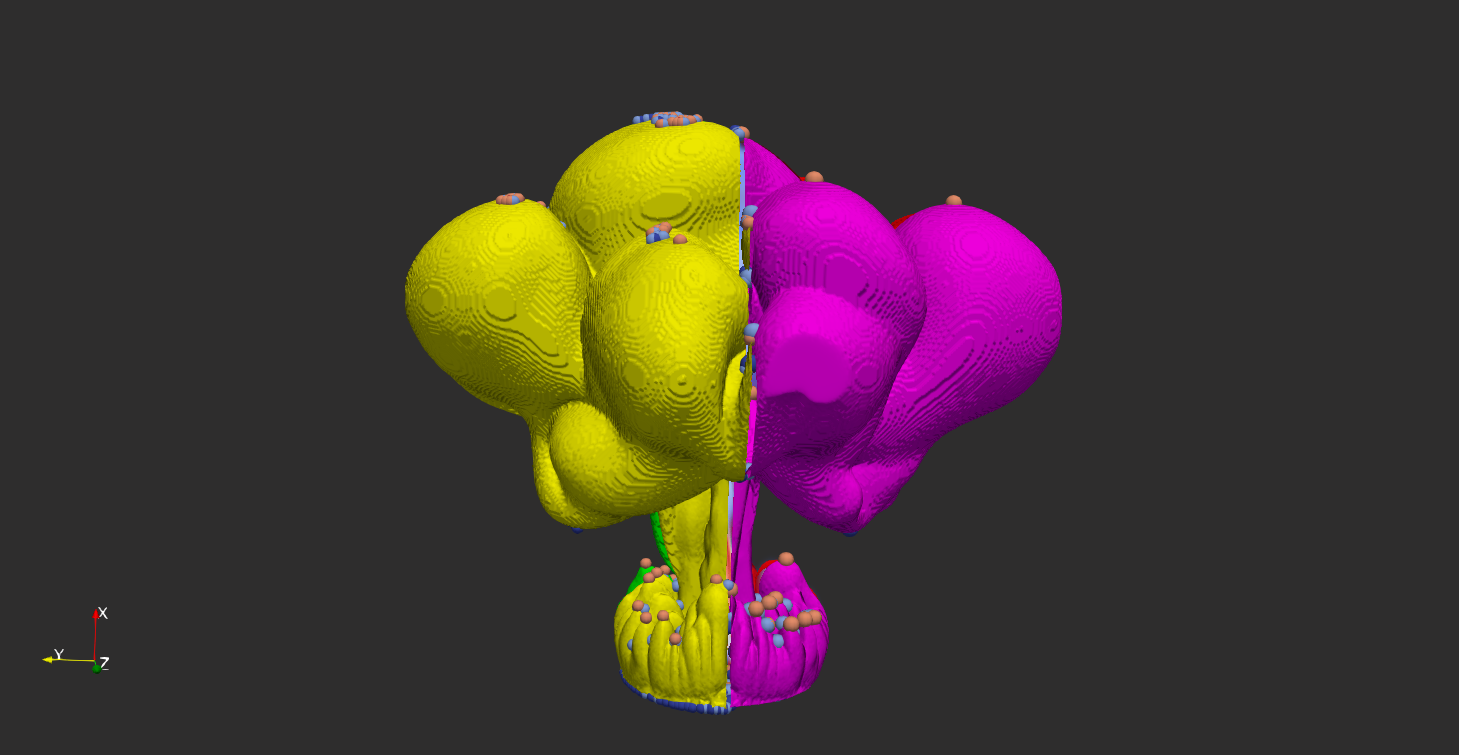

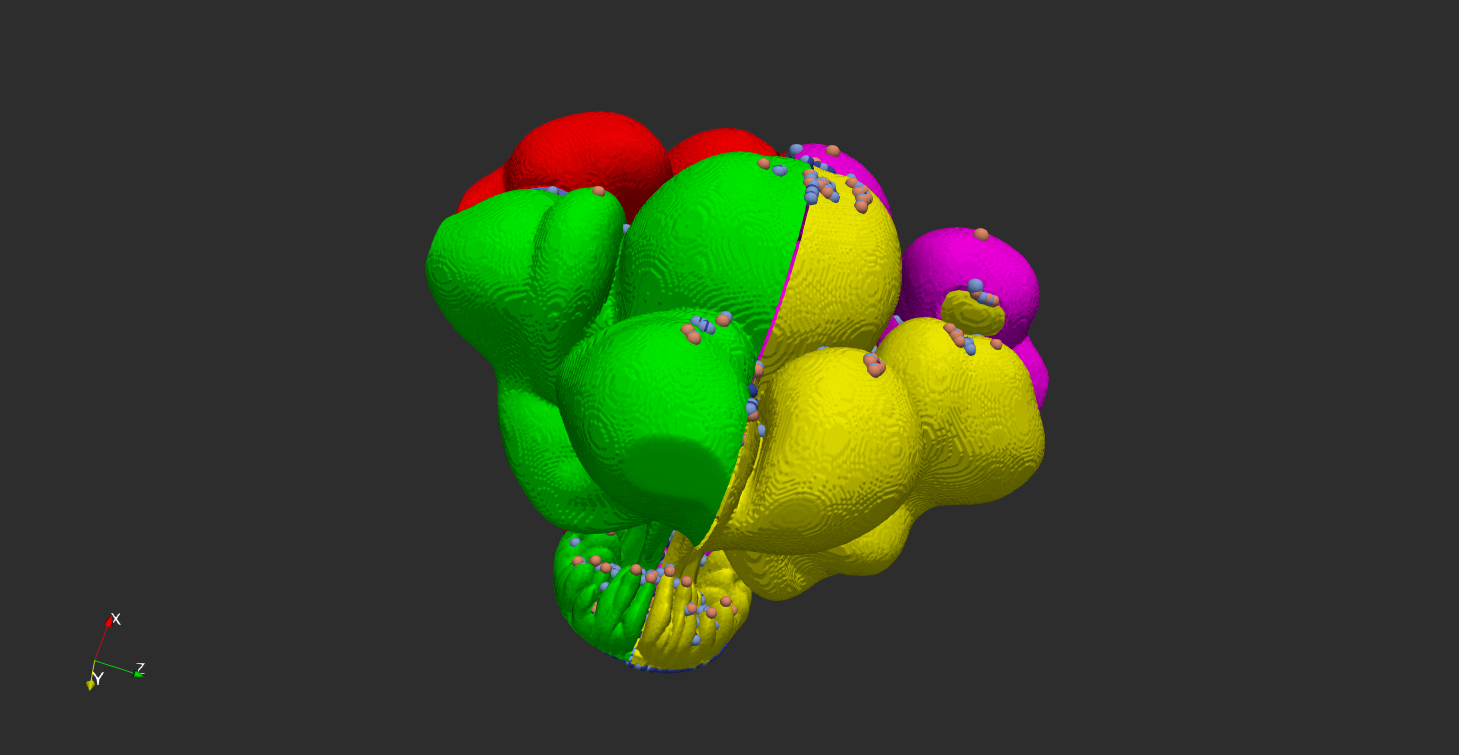

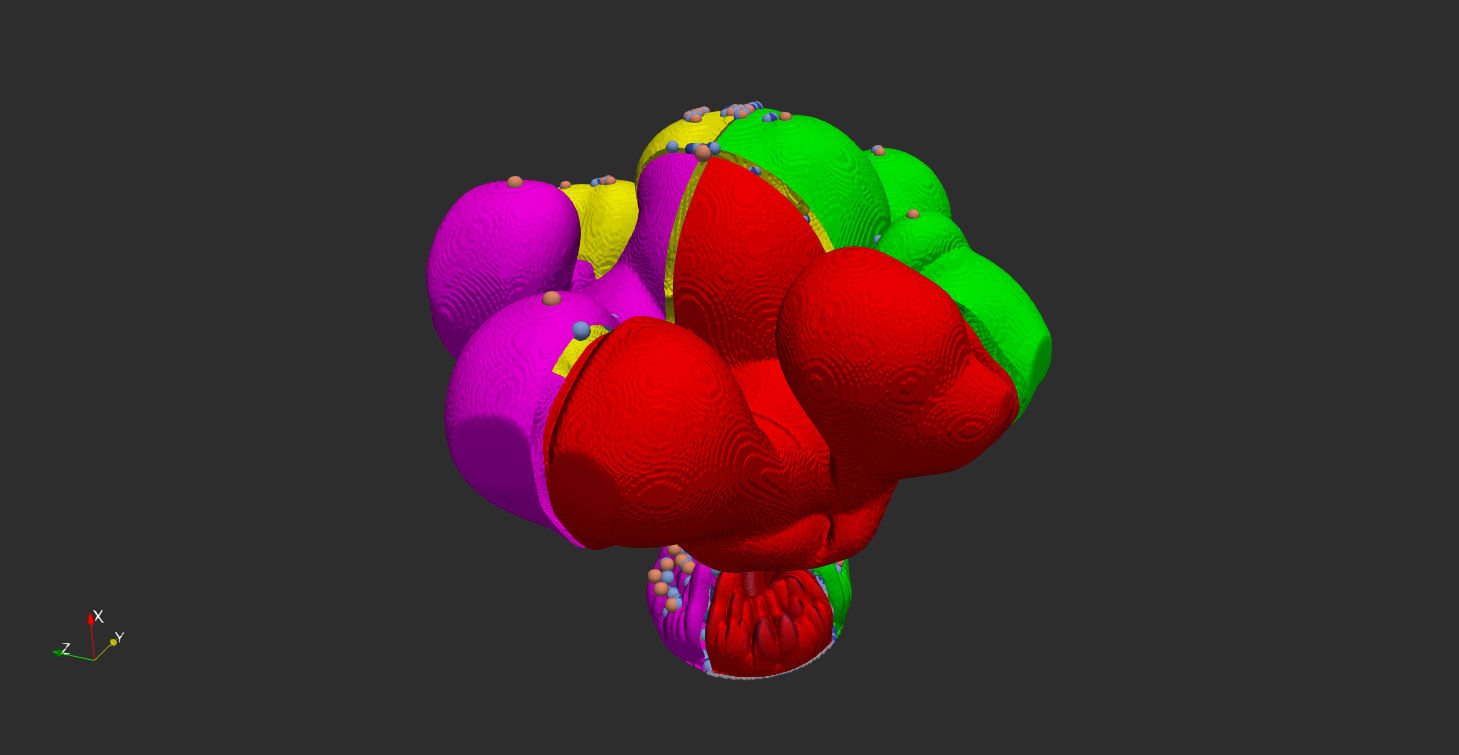